In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
# data_tree = Tree( fc.higgs_cr.JetHT_Data_UL_List )
# lumikey=2018

In [3]:
signal_tree = Tree( fc.sr.NMSSM_MX_700_MY_400 )

In [4]:
qcd_tree = Tree( fc.sr.QCD_B_List )

In [5]:
ttjet_tree = Tree(fc.sr.TTJets)

In [12]:
bkg_tree = Tree( fc.sr.QCD_B_List + [fc.sr.TTJets] )

In [13]:
trees = [signal_tree,bkg_tree]

In [24]:
def build_d3h(tree):
    d3h = np.sqrt(ak.sum((tree["higgs_m"] - 125)**2,axis=-1))
    stdv = ak.std(tree["higgs_m"]-125,axis=-1)
    avg = ak.mean(tree["higgs_m"]-125,axis=-1)
    tree.extend(d3h=d3h,higgs_m_std=stdv,higgs_m_avg=avg)

In [25]:
for tree in trees: build_d3h(tree)

Optimization terminated successfully.
         Current function value: -46.787829
         Iterations: 19
         Function evaluations: 42


array([46.87533152])

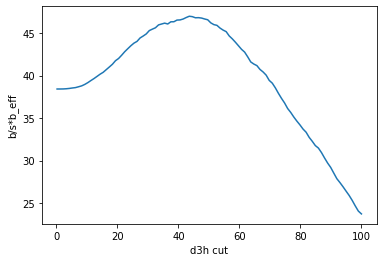

In [85]:
optimize_var_cut(trees,"d3h",method=max,varmax=100,plot=True)

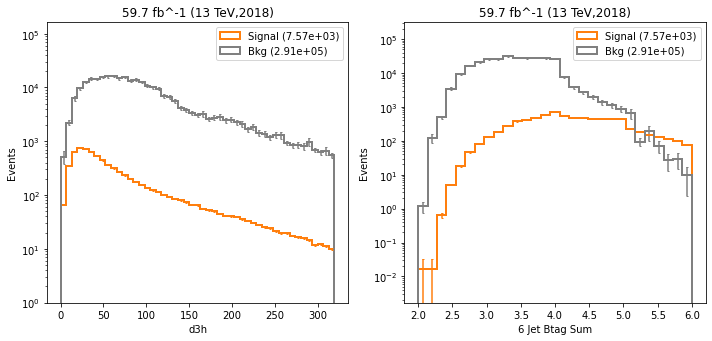

In [67]:
study.quick(trees,varlist=["d3h","jet6_btagsum"],log=1)

In [54]:
higgs_slice = lambda lo,hi : [ Selection(tree,mask=(tree["d3h"] > lo) & (tree["d3h"] < hi)) for tree in trees ]

In [86]:
hm30to40 = higgs_slice(30,40)
hm30to50 = higgs_slice(30,50)
hm30to60 = higgs_slice(30,60)

In [79]:
for tree in hm30to40: print(tree)

--- all Signal ---
Event Efficiency:   0.1
Selected Purity(6): 0.31
Passed Jet S/T:     0.69
--- all Bkg ---
Event Efficiency:   0.1


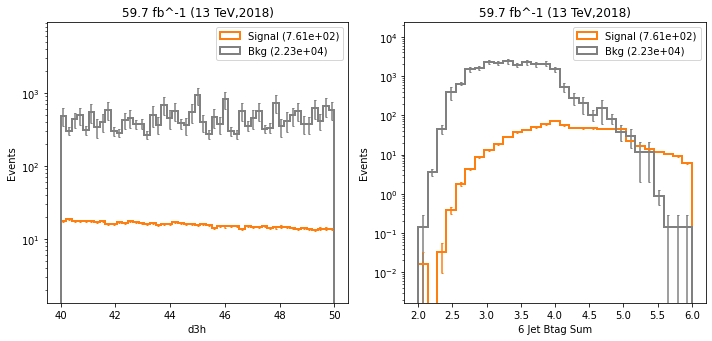

In [84]:
study.quick(hm30to40,varlist=["d3h","jet6_btagsum"],log=1)